## 9. Interpolation

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=XstK9M4jzBY&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience09.png)](https://www.youtube.com/watch?v=XstK9M4jzBY&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Interpolation constructs new prediction points from a discrete set of known data points. There are many types of interpolation such as nearest neighbor (piecewise constant), linear, polynomial, [cubic spline](https://apmonitor.com/wiki/index.php/Main/ObjectCspline), and [basis spline](https://apmonitor.com/wiki/index.php/Main/ObjectBspline). In interpolation, the data provide the shape of the approximate function, with piecewise or higher-order polynomial equations to exactly match the data points at those given discrete locations.

![charge](https://apmonitor.com/che263/uploads/Begin_Python/charge.png)

### 1D Interpolation

The `scipy.interpolate` package has a function for one (`interp1d`) dimensional interpolation where `kind` is `nearest`, `previous`, `next`, `zero`, `linear`, `quadratic`, `cubic`, or a number as `0`-`3`.

In [3]:
import numpy as np
x = np.array([0,1,2,3,4,5])
y = np.array([0.1,0.25,0.3,0.5,1.0,0.9])

# 1D interpolation
from scipy.interpolate import interp1d
f = interp1d(x,y,kind='cubic')
print(f(4.5)) # predict at 4.5

1.0983333333333334


![analyze](https://apmonitor.com/che263/uploads/Begin_Python/analyze.png)

### Plot 1D Interpolation

Several of the 1d interpolations are displayed graphically. Don't forget to add extra points such as `xp=np.linspace(0,5,100)` when plotting the interpolation or everything will look like a linear interpolation.

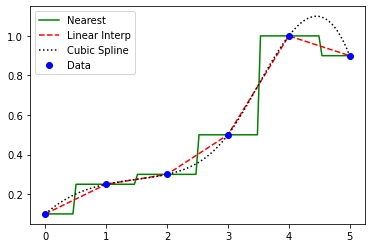

In [2]:
xp = np.linspace(0,5,100)
y1 = interp1d(x,y,kind='nearest')
y2 = interp1d(x,y,kind=1)
y3 = interp1d(x,y,kind=3)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xp,y1(xp),'g-',label='Nearest')
plt.plot(xp,y2(xp),'r--',label='Linear Interp')
plt.plot(xp,y3(xp),'k:',label='Cubic Spline')
plt.plot(x,y,'bo',label='Data')
plt.legend()
plt.show()

One caution with retrieving values from an interpolation is that there will be an error such as `ValueError: A value in x_new is above the interpolation range.` if you request a value outside the interpolation region such as `f(5.5)`.

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Interpolation Activity

Create a linear interpolation with the following data.

```python
xr = [0.0,1.0,2.0,5.0]
yr = [0.2,0.4,1.05,1.7]
```

Use the interpolation to predict the value at `xr=3.5`.

In [6]:
xr = [0.0,1.0,2.0,5.0]
yr = [0.2,0.4,1.05,1.7]
y = interp1d(xr,yr, kind=1)

![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

The type of spline is important for certain applications such as optimization. Gradient-based solvers perform better with continuous functions that also have continuous gradients. For this reason, a quadratic or cubic spline may be preferable to a linear interpolation. The following is an example of optimization with a cubic spline in Gekko. The original function is $\frac{1}{1+25 \, x^2}$ with the objective to find the maximum using only function values at `xr=[-1.0 -0.8 -0.5 -0.25 -0.1 0.1 0.2 0.5]`.

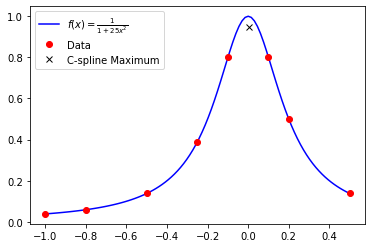

In [19]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# generate data
def f(x):
    return 1.0/(1.0+25.0*x**2)
xr = np.array([-1.0,-0.8,-0.5,-0.25,-0.1,0.1,0.2,0.5])
yr = f(xr)

# create cubic spline and maximize
c = GEKKO(remote=False)
xg = c.Var(); yg = c.Var()
c.cspline(xg,yg,xr,yr,True)
c.Maximize(yg)
c.solve(disp=False)

xp = np.linspace(-1,0.5,100)
plt.plot(xp,f(xp),'b-',label=r'$f(x) = \frac{1}{1+25x^2}$')
plt.plot(xr,yr,'ro',label='Data')
plt.plot(xg.value[0],yg.value[0],'kx',label='C-spline Maximum')
plt.legend(loc='best')
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Cubic Spline Activity

Create a cubic spline with the following data.

```python
xr = [0.0,1.0,2.0,3.0,4.0,5.0]
yr = [46.0,6.6,0.13,0.026,3.84,33.0]
```

Construct a cubic spline and find the minimum of the function.

0.012569201608173399


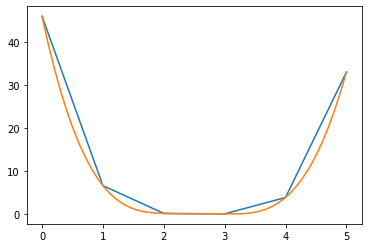

In [13]:
xr = [0.0,1.0,2.0,3.0,4.0,5.0]
yr = [46.0,6.6,0.13,0.026,3.84,33.0]
y3 = interp1d(xr,yr,kind=3)
plt.plot(xr,yr)
x = np.linspace(0,5)
plt.plot(x,y3(x))

print(np.min(y3(x)))

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### 2D Interpolation

There is also a function for two dimensional (`interp2d`) interpolation where `kind` is `linear` or `cubic`.

In [14]:
# 2D interpolation
from scipy.interpolate import interp2d
x2 = np.arange(-1.5, 1.01, 0.5)
y2 = np.arange(-1.5, 1.01, 0.5)
xx, yy = np.meshgrid(x2, y2)
zz = np.sin(xx**2+yy**2)
f2 = interp2d(x2, y2, zz, kind='cubic')
print(f2(4.5,1)) # predict z at (x=4.5, y=1)

[0.90929743]


![analyze](https://apmonitor.com/che263/uploads/Begin_Python/analyze.png)

### Plot 2D Interpolation

A 3D plot shows the data points in `red` and the cubic interpolation in `blue`. The plot includes a 3D scatter plot for the data and a surface plot for the cubic spline.

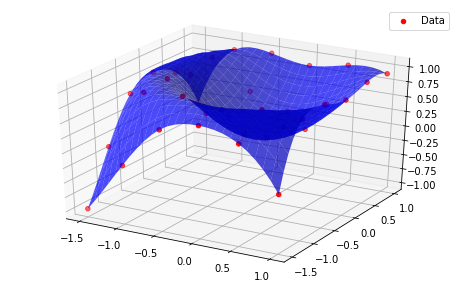

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xx,yy,zz,color='red',label='Data')
xe = np.arange(-1.5, 1.01, 0.1)
ye = np.arange(-1.5, 1.01, 0.1)
xxe, yye = np.meshgrid(xe, ye)
fe = np.empty_like(xxe)
for i in range(np.size(fe,0)):
    for j in range(np.size(fe,1)):
        fe[i,j] = f2(xxe[i,j],yye[i,j])
ax.plot_surface(xxe,yye,fe,color='blue',alpha=0.7)
plt.legend()
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### TCLab Activity

![temperature](https://apmonitor.com/che263/uploads/Begin_Python/temperature.png)

### Record Temperatures

Turn on heater 1 to 100% and record $T_1$ and $T_2$ every 10 seconds for 3 minutes. The data should include a total of 19 data points for each temperature sensor and the recording time, starting at zero.

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

In [1]:
import tclab
import time
import numpy as np
n = 19

tm = np.linspace(0,180,n)
T1 = []
T2 = []

with tclab.TCLab() as lab:
    lab.Q1(100)
    for i in range(n):
        T1.append(lab.T1)
        T2.append(lab.T2)
        print(tm[i], T1[i], T2[i])
        time.sleep(10) 

TCLab version 0.4.9
Arduino Leonardo connected on port /dev/ttyACM1 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
0.0 25.346 24.476
10.0 26.055 24.443
20.0 28.311 24.572
30.0 31.211 24.766
40.0 34.788 25.056
50.0 38.301 25.41
60.0 41.846 25.99
70.0 45.262 26.538
80.0 48.355 27.279
90.0 51.481 27.988
100.0 54.092 28.665
110.0 56.67 29.567
120.0 58.926 30.47
130.0 61.214 31.243
140.0 63.438 32.178
150.0 65.371 32.822
160.0 66.982 33.467
170.0 68.594 34.369
180.0 70.076 35.078
TCLab disconnected successfully.


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Interpolation

Create an interpolation function between the measured points for $T_1$ using a linear interpolation. Show the recorded $T_1$ as red dots and the linear interpolation as a black line. Add x-label and y-labels as well as a plot legend.

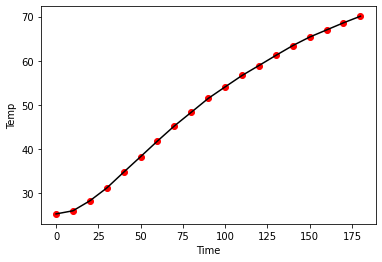

In [5]:
import matplotlib.pyplot as plt
f = interp1d(tm, T1, kind="linear")

plt.plot(tm,T1, 'ro')
plt.plot(tm, f(tm), 'k-')
plt.xlabel('Time');plt.ylabel('Temp')
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Interpolation versus Regression

Create an interpolation function between the measured points for $T_2$ using a cubic spline. Compare the piecewise cubic spline to a 3rd order polynomial regression. Show the recorded $T_2$ as blue dots, the cubic spline interpolation as a black dashed line, and the polynomial regression as a red dotted line. Add appropriate labels to the plot.

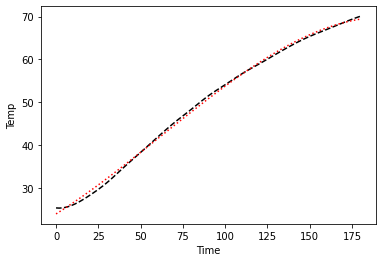

In [6]:
f = interp1d(tm,T1,3)
p = np.polyfit(tm,T1, 3)

x = np.linspace(0,180,100)
plt.plot(x,f(x), 'k--', label="Cubic Spline")
plt.plot(x, np.polyval(p,x),'r:', label="poly")
plt.xlabel('Time');plt.ylabel('Temp')
plt.show()
